In [23]:
from sklearn import tree 
import pandas as pd
import numpy as np
clf = tree.DecisionTreeClassifier() 
X = [[0, 0], [1, 1]]
y = [0, 1]

clf.fit(X,y)
clf.predict([[2.,2.]])

array([1])

In [24]:
clf.predict_proba([[2.,2.]])

array([[0., 1.]])

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target


Calculer les statistiques (moyenne et écart-type) des quatre variables
explicatives :
longueur de sépale, largueur de sépale, longueur de pétale et largeur de pétale.

In [26]:
moyenne = np.mean(X, axis=0)
ecart_type = np.std(X, axis=0)

nom_types = iris.feature_names
for i in range(len(nom_types)):
    nom = nom_types[i]
    m = moyenne[i]
    e = ecart_type[i]
    print(f"{nom} : Moyenne = {m:.2f}, Écart-type = {e:.2f}")



sepal length (cm) : Moyenne = 5.84, Écart-type = 0.83
sepal width (cm) : Moyenne = 3.06, Écart-type = 0.43
petal length (cm) : Moyenne = 3.76, Écart-type = 1.76
petal width (cm) : Moyenne = 1.20, Écart-type = 0.76


Combien y a-t-il d’exemples de chaque classe ?

In [27]:
nom_classe = iris.target_names

unique, counts = np.unique(y, return_counts=True)


for i in range(len(nom_classe)):
    nom = nom_classe[i]
    n = counts[i]
    print(f"{nom} : {n} exemples")

setosa : 50 exemples
versicolor : 50 exemples
virginica : 50 exemples


In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=0)

In [29]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

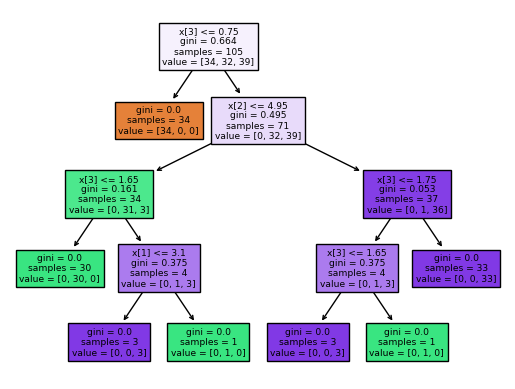

In [30]:
tree.plot_tree(clf, filled=True)

In [31]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [32]:
clf.score(X_test, y_test)

0.9777777777777777

0.9777777777777777

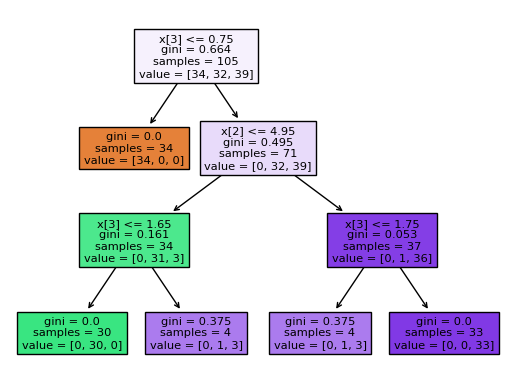

In [33]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)
tree.plot_tree(clf, filled=True)
clf.predict(X_test)
clf.score(X_test, y_test)

0.9111111111111111

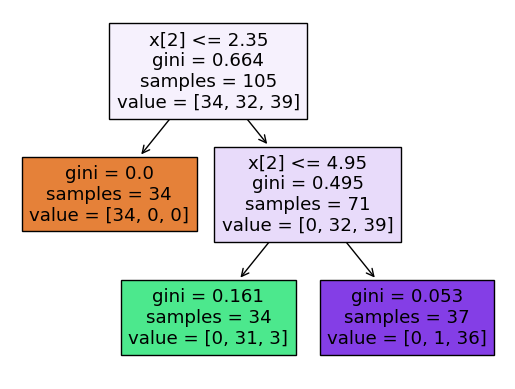

In [34]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 20)
clf.fit(X_train, y_train)
tree.plot_tree(clf, filled=True)
clf.predict(X_test)
clf.score(X_test, y_test)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05,
random_state=0)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.7\ngini = 0.571\nsamples = 7\nvalue = [4, 1, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(0.6, 0.5, 'x[1] <= 2.8\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]')]

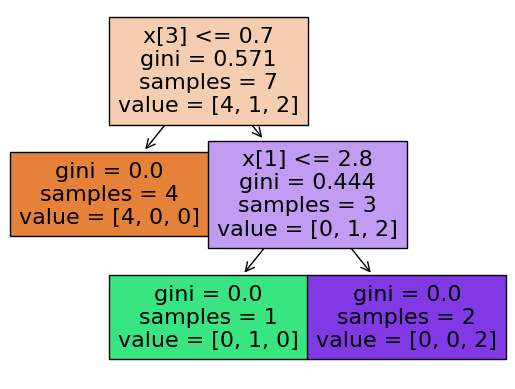

In [36]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
tree.plot_tree(clf, filled=True)

In [37]:
y_pred=clf.predict(X_test)
precision=clf.score(X_test, y_test)

Calculez le taux d’éléments mal classifiés sur l’ensemble de test

In [38]:

#taux d'erreur = 1 - accuracy , ici fait par la méthode .score
taux_erreur = 1 - precision
print(f"Précision          : {precision:.4f}")
print(f"Taux d’erreur:     : {taux_erreur:.4f}")

Précision          : 0.7063
Taux d’erreur:     : 0.2937


In [52]:
param_grid = {
    'max_depth': [None, 1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 5, 10, 20, 50]
}
clf = tree.DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',   # on optimise l’accuracy
    cv=4,                  # 5-fold cross-validation
    n_jobs=-1,             # parallélisation
    return_train_score=True
)
grid_search.fit(X_train, y_train)

/home/laeky/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 5, 10, 20, 50]},
             return_train_score=True, scoring='accuracy')

In [53]:
print("Meilleurs paramètres :", grid_search.best_params_)
print(f"Meilleure accuracy CV : {grid_search.best_score_:.3f}")


Meilleurs paramètres : {'max_depth': None, 'min_samples_leaf': 1}
Meilleure accuracy CV : 0.625


pair :[2, 3]


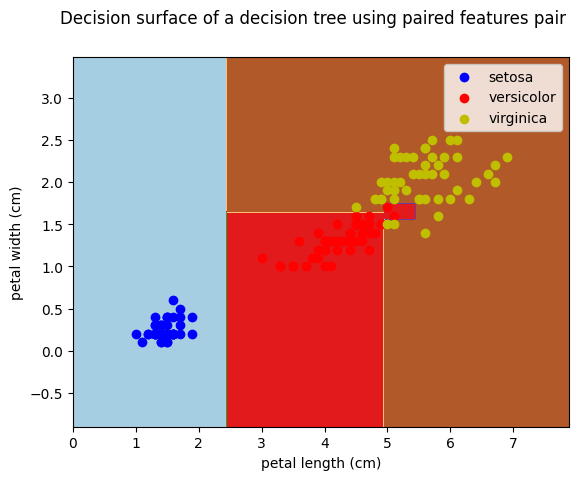

In [54]:
import matplotlib.pyplot as plt
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02
# Choisir les attributs longueur et largeur des pétales
pair = [2, 3]
# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target
# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)


# Affichage de la surface de décision
def Affichage_Surface():
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min,y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    # Affichage des points d'apprentissage
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i])
    plt.axis("tight")
    print(f'pair :{pair}')
    plt.suptitle("Decision surface of a decision tree using paired features pair")
    plt.legend()
    plt.show()

Affichage_Surface()

Refaire l’affichage pour les autres paires d’attributs. Sur quelle paire la séparation
entre les classes est la plus marquée ?

pair :[0, 1]


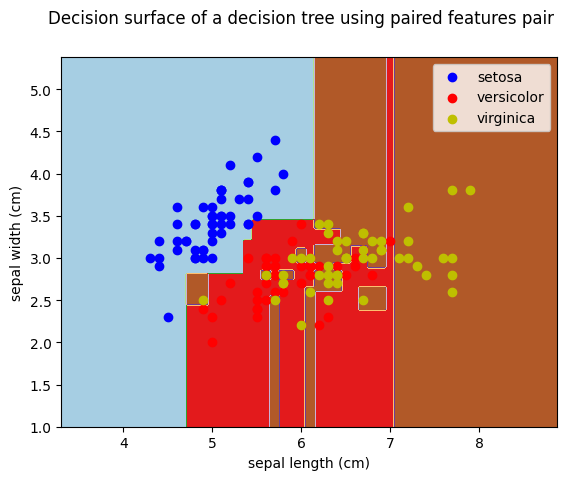

pair :[0, 2]


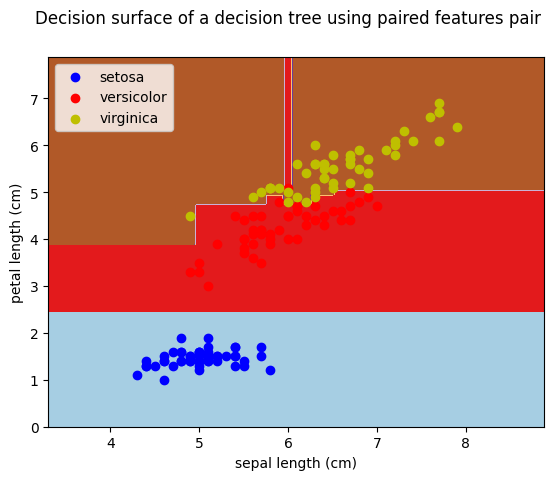

pair :[0, 3]


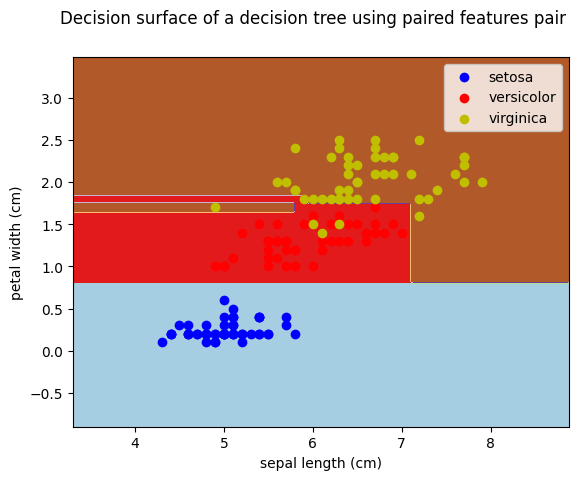

pair :[1, 2]


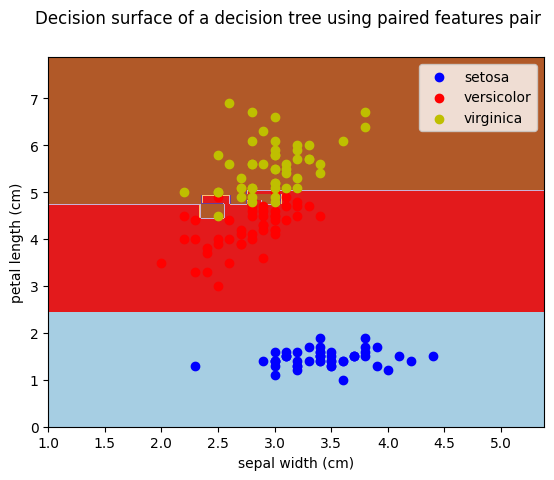

pair :[1, 3]


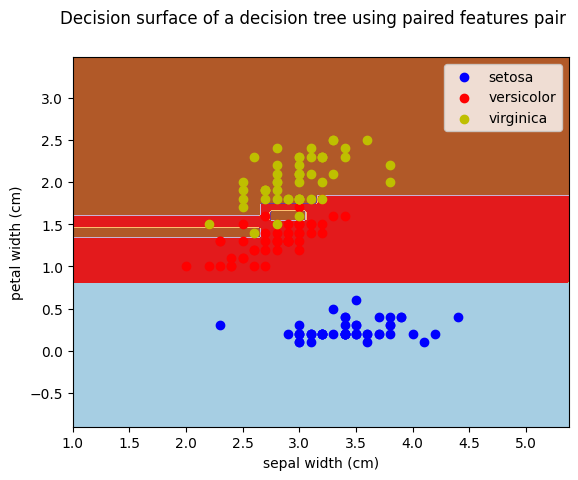

In [55]:

# Choisir les attributs 
pair = [0, 1]
# On ne garde seulement les deux attributs
X = iris.data[:, pair]
# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)


# Affichage de la surface de décision
Affichage_Surface()


# Choisir les attributs
pair = [0, 2]
# On ne garde seulement les deux attributs
X = iris.data[:, pair]
# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)


# Affichage de la surface de décision
Affichage_Surface()

# Choisir les attributs 
pair = [0, 3]
# On ne garde seulement les deux attributs
X = iris.data[:, pair]
# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)


# Affichage de la surface de décision
Affichage_Surface()

# Choisir les attributs 
pair = [1,2]
# On ne garde seulement les deux attributs
X = iris.data[:, pair]
# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)


# Affichage de la surface de décision
Affichage_Surface()

# Choisir les attributs 
pair = [1,3]
# On ne garde seulement les deux attributs
X = iris.data[:, pair]
# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)


# Affichage de la surface de décision
Affichage_Surface()




Text(0.5, 1.0, 'Signal sinusoïdal bruité')

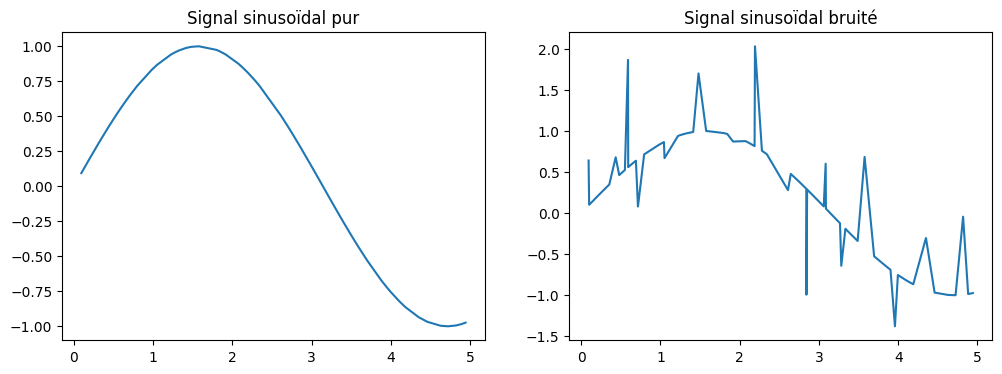

In [77]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

# Créer les données d'apprentissage
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
plt.plot(X, y)
plt.title("Signal sinusoïdal pur")
# On ajoute un bruit aléatoire tous les 5 échantillons
y[::5] += 3 * (0.5 - np.random.rand(16))
fig.add_subplot(122)
plt.plot(X, y)
plt.title("Signal sinusoïdal bruité")

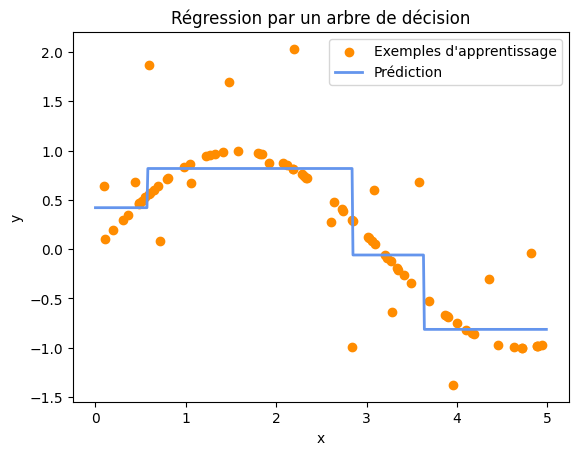

In [78]:
# Apprendre le modèle
reg = tree.DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)
# Prédiction sur la même plage de valeurs
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)
# Affichage des résultats
plt.figure()
plt.scatter(X, y, c="darkorange", label="Exemples d'apprentissage")
plt.plot(X_test,y_pred,color="cornflowerblue",label="Prédiction",linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression par un arbre de décision")
plt.legend()
plt.show()

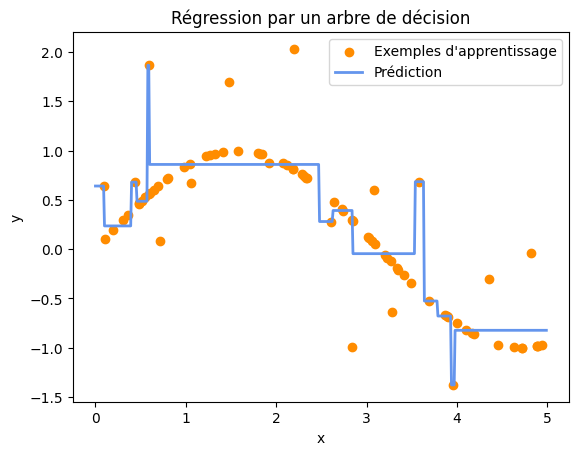

In [68]:
# Apprendre le modèle
reg = tree.DecisionTreeRegressor(max_depth=4)
reg.fit(X, y)
# Prédiction sur la même plage de valeurs
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)
# Affichage des résultats
plt.figure()
plt.scatter(X, y, c="darkorange", label="Exemples d'apprentissage")
plt.plot(X_test,y_pred,color="cornflowerblue",label="Prédiction",linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression par un arbre de décision")
plt.legend()
plt.show()

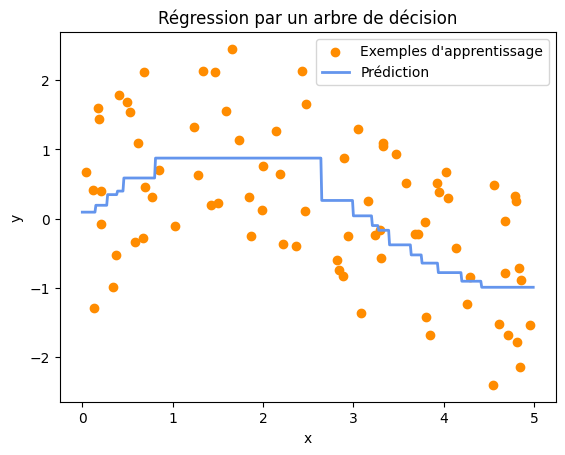

In [100]:
X1 = [[0, 0], [2, 2]]
y1 = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X1, y1)
clf.predict([[1, 1]])

X1 = np.sort(5 * np.random.rand(80, 1), axis=0)
y1 = np.sin(X1).ravel()
# Apprendre le modèle
reg = tree.DecisionTreeRegressor(max_depth=4)
reg.fit(X1, y1)

# On ajoute un bruit aléatoire tous les échantillons
y1 += 3 * (0.5 - np.random.rand(80))

# Prédiction sur la même plage de valeurs
X_test1 = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred1 = reg.predict(X_test1)
# Affichage des résultats
plt.figure()
plt.scatter(X1, y1, c="darkorange", label="Exemples d'apprentissage")
plt.plot(X_test1,y_pred1,color="cornflowerblue",label="Prédiction",linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression par un arbre de décision")
plt.legend()
plt.show()



Pour approfondir, chargez la base de données Diabètes du module sklearn.datasets et faire une partition aléatoire en partie apprentissage et
partie test (70% apprentissage, 30% test). Construire un modèle d’arbre de
regression sur cette base. Calculer l’erreur quadratique moyenne sur l’ensemble
de test. Faire un grid search pour trouver la valeur du paramètre max_depth qui
minimise cette erreur.

In [106]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error

# Chargement de la base de données diabètes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Séparation données d'entrainement et tes
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=0)


reg = tree.DecisionTreeRegressor()
reg = reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

#Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print(mse)

6084.06015037594


In [117]:

param_grid = {
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

grid_search = GridSearchCV(
    estimator=reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # on optimise le mean squared error
    cv=4,                  # 5-fold cross-validation
    n_jobs=-1,             # parallélisation
    return_train_score=True
)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)
print(f"Meilleure mse ( le plus faible) CV : {-grid_search.best_score_:.3f}")


Meilleurs paramètres : {'max_depth': 2}
Meilleure mse ( le plus faible) CV : 4019.721
